In [1]:
import requests
from bs4 import BeautifulSoup
import jieba
import jieba.analyse
import jieba.posseg as pseg
import matplotlib.pyplot as plt
from snownlp import SnowNLP
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from textrank4zh import TextRank4Keyword, TextRank4Sentence

In [2]:
# fetch news content from url
def fetch_content(url):
    try:
        html = requests.get(url, timeout=10)
        return html.content
    except requests.exceptions.RequestException as err:
        print (err)
        return None

In [3]:
# extract text content from the html content of a web page
def extract_text(content):
    soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
    return soup.get_text()

In [4]:
# abstract key words and sentences from text
def abstract_words_sentences(text ,words_num = 20, sentences_num = 3, analyzer = 'snow'):
    if analyzer == 'snow':
        snow_analyzing(text, words_num=words_num, sentences_num = sentences_num)
    else:
        if analyzer != 'textrank':
            print('未检测到分析器 {0}, 正在使用textrank替代 ...'.format(analyzer))
        textrank_analyzing(text, words_num = words_num, sentences_num = sentences_num)

In [5]:
def snow_analyzing(text, words_num = 20, sentences_num = 3):
    snow = SnowNLP(text)
    print(snow.keywords(words_num))
    print(snow.summary(sentences_num))

In [6]:
def textrank_analyzing(text, words_num = 20, sentences_num = 3):
    
    # output keywords, lower cases, minmum word length is 2, analyzing window size is 5
    tr4w = TextRank4Keyword()
    tr4w.analyze(text=text, lower=True, window=5)
    keywords = [item.word for item in tr4w.get_keywords(words_num, word_min_len=2)]
    print(keywords)
    
    tr4s = TextRank4Sentence()
    tr4s.analyze(text=text, lower=True, source='all_filters')
    key_sentences = [item.sentence for item in tr4s.get_key_sentences(num=sentences_num)]
    print(key_sentences)

In [7]:
def remove_stop_words(f):
    stop_words = ['Movie']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

def create_word_cloud(f, max_words = 100):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
        font_path = './msyh.ttf'
    )
    wordcloud = wc.generate(cut_text)
    # output word cloud to an image file
    wordcloud.to_file("wordcloud.jpg")
    # display word cloud
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [8]:
def analyze_news(url, words_num = 20, sentences_num = 3, analyzer = 'textrank'):
    # fetch content from url
    content = fetch_content(url)
    if content is None:
        return
    
    # extract text from html content
    text = extract_text(content)
    
    # remove non-Chinese content
    text = re.sub('[^\u4e00-\u9fa5，。！：、；]{3,}', '', text)
    
    # abstract key words and sentences
    abstract_words_sentences(text, words_num = words_num, sentences_num = sentences_num, analyzer = analyzer)
    
    # cut off words from the text
    seg_list = jieba.cut(text, cut_all=False)
    all_words = ' '.join(seg_list)
    
    # create word cloud
    create_word_cloud(all_words)

<IPython.core.display.Javascript object>

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\alexs\AppData\Local\Temp\jieba.cache


未检测到分析器 rain, 正在使用textrank替代 ...


Loading model cost 0.551 seconds.
Prefix dict has been built successfully.


['快递', '丰巢', '物流', '收费', '免费', '用户', '没有', '小区', '公司', '网点', '顺丰', '收入', '行业', '成本', '企业', '时间', '消费者', '派送', '服务', '模式']
['上海中环花苑小区业主委员会在致丰巢公司的公开信中称，丰巢的客户经理在上门洽谈进场的时候，千篇一律的说辞是“对客户免费的”，正因为如此，各小区业委会和物业才把丰巢快递柜当做半公益的项目引进小区，如今却在没有全面告知的情况下单方面宣布收费', '登录关闭物流丰巢：收费是一定要收费的，这辈子都不可能再免费了曾经靠免费维持的“丰巢-快递员-消费者”之间微妙平衡被打破寒冰发布于分钟前物流在烤架上熏了半个月后，丰巢终于下来了', '免费掩盖了尴尬的模式丰巢遭遇如此尴尬境地，核心原因之一是：它本是一个面向快递员的端生意，却想对并未真正握在手里的端消费者收费']
根据词频，开始生成词云!


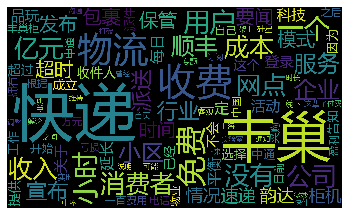

In [9]:
url = input('请输入新闻网址:')
analyze_news(url, analyzer='rain')